In [30]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd

In [32]:
lng = pd.read_csv("LNG.csv", index_col=0)

In [33]:
spy = pd.read_csv("SPY.csv", index_col=0)

In [34]:
lng.head()

,Adj_Close,Adj_Volume
Date,,
1994-04-04,72.0,0.0
1994-04-05,108.0,0.0
1994-04-06,108.0,0.0
1994-04-07,108.0,0.0
1994-04-08,108.0,0.0


In [35]:
lng_df = lng['2016-04-15':'2018-04-10']

In [36]:
lng_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,37.13,4293775.0
2016-04-18,36.90,3445852.0
2016-04-19,37.12,3748050.0
2016-04-20,37.77,2470384.0
2016-04-21,37.21,2043988.0
...,...,...
2018-04-04,54.30,1816771.0
2018-04-05,56.21,2533635.0
2018-04-06,54.36,1754446.0


In [37]:
spy_df = spy['2016-04-15':'2018-04-10']

In [38]:
spy_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,199.760673,75761600.0
2016-04-18,201.164330,75277700.0
2016-04-19,201.798846,88316100.0
2016-04-20,201.991139,81100300.0
2016-04-21,200.904747,85695000.0
...,...,...
2018-04-04,263.560000,123574054.0
2018-04-05,265.640000,80993290.0
2018-04-06,259.720000,179483634.0


In [39]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [40]:
import matplotlib.pyplot as plt

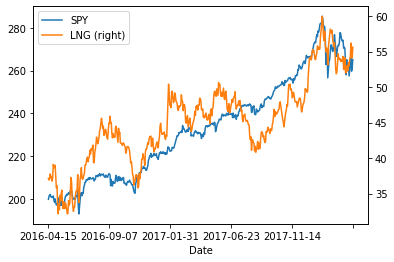

In [41]:
# Plot the Adj_Close columns for SPY and LNG
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot

In [42]:
plt.clf()  # clear the plot space

<Figure size 432x288 with 0 Axes>

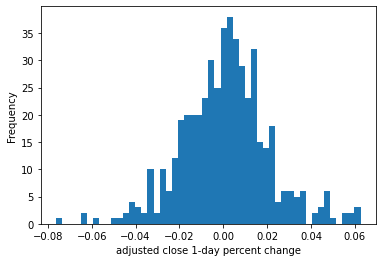

In [43]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

In [44]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [45]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct
Date,,,,,
2016-04-15,37.13,4293775.0,37.40,NaN,NaN
2016-04-18,36.90,3445852.0,36.75,NaN,NaN
2016-04-19,37.12,3748050.0,37.25,NaN,NaN
2016-04-20,37.77,2470384.0,39.11,NaN,NaN
2016-04-21,37.21,2043988.0,38.62,NaN,NaN
...,...,...,...,...,...
2018-04-04,54.30,1816771.0,NaN,0.024494,0.023370
2018-04-05,56.21,2533635.0,NaN,-0.010318,0.074761
2018-04-06,54.36,1754446.0,NaN,0.023363,0.017025


In [46]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.164861
5d_close_future_pct     -0.164861             1.000000


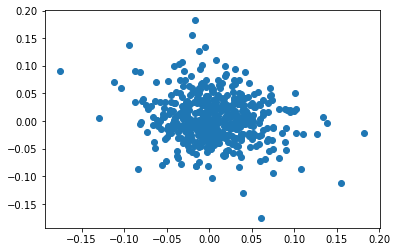

In [47]:
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

In [50]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

In [56]:
pip install ta-lib

  Using cached TA-Lib-0.4.18.tar.gz (265 kB)
  ERROR: Command errored out with exit status 1:
   command: /srv/conda/envs/notebook/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-lznragfp/ta-lib/setup.py'"'"'; __file__='"'"'/tmp/pip-install-lznragfp/ta-lib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-fmcxk7sw
       cwd: /tmp/pip-install-lznragfp/ta-lib/
  Complete output (27 lines):
  /tmp/pip-install-lznragfp/ta-lib/setup.py:79: UserWarning: Cannot find ta-lib library, installation may fail.
    warnings.warn('Cannot find ta-lib library, installation may fail.')
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/talib
  copying talib/stream.py -> build/lib.linux-x86_64-3.7/talib
  copying t

In [ ]:
import talib

In [55]:
# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
    
print(feature_names)

NameError: name 'talib' is not defined